## Apply PCA and Clustering to Wholesale Customer Data

In this homework, we'll examine the [**_Wholesale Customers Dataset_**](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository.  This dataset contains the purchase records from clients of a wholesale distributor.  It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description** 
:-----:|:-----:
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous);
MILK| Annual spending (m.u.) on milk products (Continuous); 
GROCERY| Annual spending (m.u.)on grocery products (Continuous); 
FROZEN| Annual spending (m.u.)on frozen products (Continuous) 
DETERGENTS\_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous) 
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous); 

**_TASK:_** Read in `wholesale_customers_data.csv` from the `datasets` folder and store in a dataframe.  Store the `Channel` column in a separate variable, and then drop the `Channel` and `Region` columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components).  Print out the explained variance for each principal component. 

## K-Means, but Without All the Supervision
 

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**Challenge:_** Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [3]:
df = pd.read_csv('../Notebooks/Datasets/Wholesale-customers-data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
y = df['Channel']
x = df.drop(columns=['Channel', 'Region'], axis=1)

In [11]:
len(x)

440

## Scale The Data

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object 
scaler = StandardScaler()

# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler = scaler.fit(x)

# # Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(x)

## Apply Clustering To Scaled Data

In [6]:
# Use model for k-means clustering with sklearn
from sklearn.cluster import KMeans

## Apply Elbow Method

In [7]:
# create an empyty list
wcss = []

# create all possible cluster solutions with a loop
# we have chosen to get the wcss solutions from 1 to 10 clusters (Completely arbitrarily chosen)
for i in range(1,11):
    # cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the standardized data
    kmeans.fit(inputs_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
# check the result    
wcss

[2640.0,
 1954.7048062408778,
 1610.1723291819897,
 1317.8383605390707,
 1058.7712532570085,
 924.6943917751165,
 822.1209606006203,
 744.3591264590843,
 660.2031379479315,
 610.4243691903964]

Text(0, 0.5, 'WCSS')

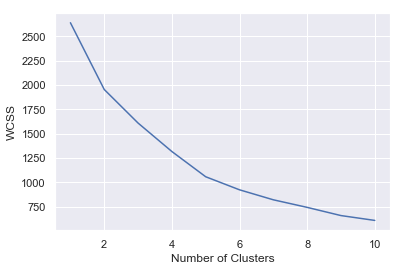

In [8]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## Explore Clustering Solutions and Select the Number of Clusters

In [9]:
# Fiddle with k (the number of clusters) based on the elbow 
kmeans_new = KMeans(2)
# Fit the data
kmeans_new.fit(inputs_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(inputs_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(clusters_new['cluster_pred'], )

In [10]:
clusters_new['cluster_pred'].value_counts()

0    391
1     49
Name: cluster_pred, dtype: int64

In [28]:
# x = clusters_new.drop('cluster_pred', axis=1)

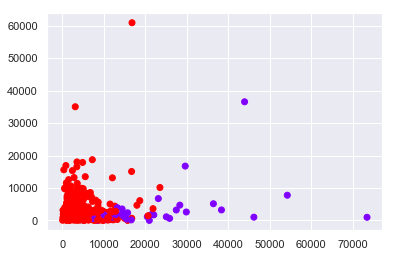

In [38]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_new['Milk'],clusters_new['Frozen'],c=clusters_new['cluster_pred'],cmap='rainbow')

## Apply PCA on Data 

In [53]:
import numpy as np
from sklearn.decomposition import PCA
import scipy


pca = PCA(n_components=2)
X_r = pca.fit_transform(x)

kmeans_new = KMeans(2)
# Fit the data
X_test_reduced = kmeans_new.fit(X_r)

# X_test_reduced = pca.transform(x)

clusters_pca = x.copy()
clusters_pca['cluster_pred'] = kmeans_new.fit_predict(X_r)


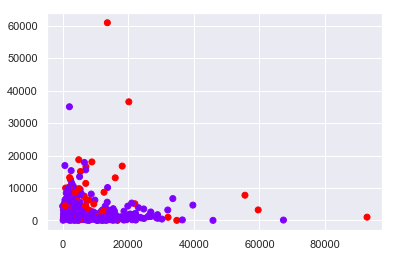

In [56]:
plt.scatter(clusters_pca['Grocery'],clusters_pca['Frozen'],c=clusters_pca['cluster_pred'],cmap='rainbow')

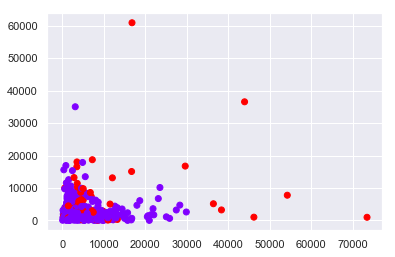

In [57]:
plt.scatter(clusters_pca['Milk'],clusters_pca['Frozen'],c=clusters_pca['cluster_pred'],cmap='rainbow')

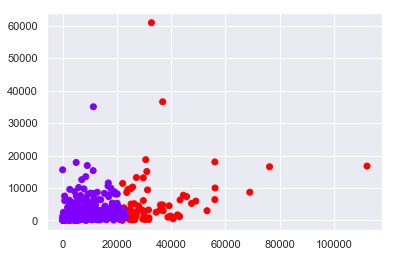

In [58]:
plt.scatter(clusters_pca['Fresh'],clusters_pca['Frozen'],c=clusters_pca['cluster_pred'],cmap='rainbow')

In [61]:
X_test_reduced = pca.transform(x)
X_test_reduced

array([[ 6.50022122e+02,  1.58551909e+03],
       [-4.42680498e+03,  4.04245151e+03],
       [-4.84199871e+03,  2.57876218e+03],
       [ 9.90346437e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972582e+03],
       [-2.76596159e+03, -9.59870727e+02],
       [-7.15550892e+02, -2.01300227e+03],
       [-4.47458367e+03,  1.42949697e+03],
       [-6.71209540e+03, -2.20590916e+03],
       [-4.82363435e+03,  1.34805592e+04],
       [-7.97482898e+03,  5.71121893e+03],
       [ 3.63937790e+01, -6.03789641e+03],
       [ 1.99402021e+04,  4.59128648e+03],
       [ 9.39669558e+03,  5.91315704e+03],
       [ 1.26603704e+04,  4.54194543e+03],
       [-2.99772590e+03, -6.09387930e+03],
       [-1.05895236e+04,  6.58421594e+03],
       [-6.36709518e+03, -3.68071267e+03],
       [ 6.62382534e+03,  1.25471953e+03],
       [-4.86153157e+03, -2.25592266e+02],
       [ 4.79424416e+03, -3.98879936e+03],
       [-7.24486684e+03, -7.34772325e+03],
       [ 1.92992657e+04, -6.93681068e+03],
       [ 1.